In [354]:
#Set-up - importing packages and data:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plot
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
%matplotlib inline

In [355]:
cd = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv')
cd

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0
...,...,...,...,...,...,...
930248,2021-01-14,Sweetwater,Wyoming,56037.0,3250,26.0
930249,2021-01-14,Teton,Wyoming,56039.0,2579,4.0
930250,2021-01-14,Uinta,Wyoming,56041.0,1794,9.0
930251,2021-01-14,Washakie,Wyoming,56043.0,836,23.0


In [356]:
#general statistical data to recieve reference for future manipulation on data:
cd.describe()

,fips,cases,deaths
count,921562.000000,930253.000000,910400.000000
mean,31270.844813,2184.935301,56.622094
std,16300.184464,11426.796033,459.918372
min,1001.000000,0.000000,0.000000
25%,19001.000000,40.000000,0.000000
50%,29217.000000,260.000000,4.000000
75%,46101.000000,1123.000000,24.000000
max,78030.000000,975693.000000,25834.000000


In [357]:
#working with relevant columns as a subset:
cd1=cd[['date', 'county', 'state','cases', 'deaths']]
cd1

,date,county,state,cases,deaths
0,2020-01-21,Snohomish,Washington,1,0.0
1,2020-01-22,Snohomish,Washington,1,0.0
2,2020-01-23,Snohomish,Washington,1,0.0
3,2020-01-24,Cook,Illinois,1,0.0
4,2020-01-24,Snohomish,Washington,1,0.0
...,...,...,...,...,...
930248,2021-01-14,Sweetwater,Wyoming,3250,26.0
930249,2021-01-14,Teton,Wyoming,2579,4.0
930250,2021-01-14,Uinta,Wyoming,1794,9.0
930251,2021-01-14,Washakie,Wyoming,836,23.0


In [358]:
#checking for missing data and initiating data cleaning:
cd1.count()
#'deaths' is missing values on close to 20,000 rows.

date      930253
county    930253
state     930253
cases     930253
deaths    910400
dtype: int64

In [360]:
#checking all New York State data is accounted for:
cd1[cd1['state'] == 'New York'].count()

date      17620
county    17620
state     17620
cases     17620
deaths    17620
dtype: int64

In [361]:
#Fuzzy Matching to make sure all are counted:
cd1[cd1['state'].str.contains('New York')].count()

date      17620
county    17620
state     17620
cases     17620
deaths    17620
dtype: int64

In [362]:
#checking for null values:
cd1.isnull().sum()

date          0
county        0
state         0
cases         0
deaths    19853
dtype: int64

In [363]:
#Cleaning null in 'deaths' by assigning median value to them:
median = cd1['deaths'].median()
cd1['deaths'].fillna(median, inplace=True)
cd1

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


,date,county,state,cases,deaths
0,2020-01-21,Snohomish,Washington,1,0.0
1,2020-01-22,Snohomish,Washington,1,0.0
2,2020-01-23,Snohomish,Washington,1,0.0
3,2020-01-24,Cook,Illinois,1,0.0
4,2020-01-24,Snohomish,Washington,1,0.0
...,...,...,...,...,...
930248,2021-01-14,Sweetwater,Wyoming,3250,26.0
930249,2021-01-14,Teton,Wyoming,2579,4.0
930250,2021-01-14,Uinta,Wyoming,1794,9.0
930251,2021-01-14,Washakie,Wyoming,836,23.0


In [364]:
#checking for no missing values after manipulation to begin visualization and analysis:
cd1.isnull().sum()

date      0
county    0
state     0
cases     0
deaths    0
dtype: int64

In [365]:
#Understanding NY cases for the last 30 days:
cd2 = cd1[cd1['state']== "New York"]
cd2
#number of rows matches earlier verification - now it is possible to work on the new subset pertaining to NY alone.

,date,county,state,cases,deaths
416,2020-03-01,New York City,New York,1,0.0
448,2020-03-02,New York City,New York,1,0.0
482,2020-03-03,New York City,New York,2,0.0
518,2020-03-04,New York City,New York,2,0.0
519,2020-03-04,Westchester,New York,9,0.0
...,...,...,...,...,...
928906,2021-01-14,Washington,New York,1332,20.0
928907,2021-01-14,Wayne,New York,3448,50.0
928908,2021-01-14,Westchester,New York,80868,1763.0
928909,2021-01-14,Wyoming,New York,1939,40.0


In [367]:
#Understanding new cases and deaths in NYC over the last 30 days:
city = cd2.query(r'state=="New York" & county=="New York City"')
city.to_csv('NYTCovidData.csv', index=False)
city = pd.read_csv('NYTCovidData.csv')
city['New cases'] = city['cases'] - city['cases'].shift(1).fillna(0)
city['New deaths'] = city['deaths'] - city['deaths'].shift(1).fillna(0)
NYC = city.tail(30)
NYC

,date,county,state,cases,deaths,New cases,New deaths
290,2020-12-16,New York City,New York,370109,24578.0,2911.0,17.0
291,2020-12-17,New York City,New York,373320,24613.0,3211.0,35.0
292,2020-12-18,New York City,New York,377728,24652.0,4408.0,39.0
293,2020-12-19,New York City,New York,381067,24677.0,3339.0,25.0
294,2020-12-20,New York City,New York,383808,24697.0,2741.0,20.0
295,2020-12-21,New York City,New York,387595,24735.0,3787.0,38.0
296,2020-12-22,New York City,New York,391634,24768.0,4039.0,33.0
297,2020-12-23,New York City,New York,395810,24790.0,4176.0,22.0
298,2020-12-24,New York City,New York,401251,24842.0,5441.0,52.0
299,2020-12-25,New York City,New York,405857,24889.0,4606.0,47.0


In [368]:
NYC['New cases'].median()

4595.0

In [369]:
NYC['New deaths'].median()

42.0

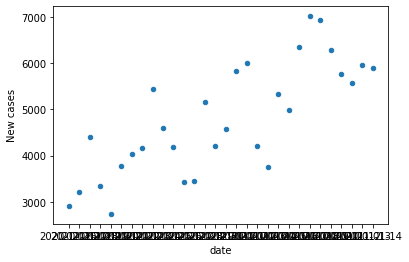

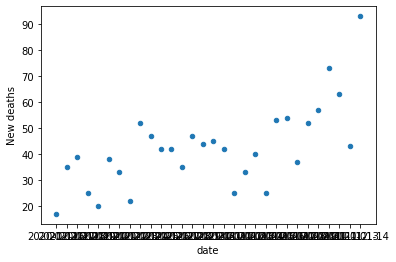

In [370]:
NYC.plot(kind='scatter', x='date', y='New cases') and NYC.plot(kind='scatter', x='date', y='New deaths')

In [371]:
#issue with date formatting prevents from seeing all dates

#Data Analysis:

#The number of confirmed COVID-19 cases and deaths in NYC has been staedily growing over the last 30 days.
#the number of cases has spiked from 3000 to 5000 after peaking at around 7000 new cases per day, the number of deaths has also spiked from 35 to 93 per day.
#the median number of new cases per day over the mentioned time period is 4595 and the median death toll is 42 per day. The growth in new cases is more vertical than that of the deaths.

In [372]:
#Comparing NYC to other cities:
als = cd1[(cd1['county'] == 'New York City')|(cd1['county'] == 'Los Angeles')|(cd1['county'] == 'St. Louis') & (cd1['state'] == 'Missouri')|(cd1['county'] == 'Cook') & (cd1['state'] == 'Illinois')]
als

,date,county,state,cases,deaths
3,2020-01-24,Cook,Illinois,1,0.0
6,2020-01-25,Cook,Illinois,1,0.0
9,2020-01-26,Los Angeles,California,1,0.0
11,2020-01-26,Cook,Illinois,1,0.0
14,2020-01-27,Los Angeles,California,1,0.0
...,...,...,...,...,...
925636,2021-01-13,New York City,New York,504826,25741.0
927212,2021-01-14,Los Angeles,California,975693,13234.0
927623,2021-01-14,Cook,Illinois,426658,8889.0
928606,2021-01-14,St. Louis,Missouri,77057,1547.0


In [373]:
als0 = cd1.query(r'state=="California" & county=="Los Angeles"') 
als0.to_csv('NYTCovidData.csv', index=False)
als0 = pd.read_csv('NYTCovidData.csv')
als0['New cases'] = als0['cases'] - als0['cases'].shift(1).fillna(0)
als0['New deaths'] = als0['deaths'] - als0['deaths'].shift(1).fillna(0)
all0 = als0.tail(30)
all0

,date,county,state,cases,deaths,New cases,New deaths
325,2020-12-16,Los Angeles,California,566185,8568.0,22236.0,137.0
326,2020-12-17,Los Angeles,California,580505,8664.0,14320.0,96.0
327,2020-12-18,Los Angeles,California,596910,8757.0,16405.0,93.0
328,2020-12-19,Los Angeles,California,610562,8817.0,13652.0,60.0
329,2020-12-20,Los Angeles,California,623875,8875.0,13313.0,58.0
330,2020-12-21,Los Angeles,California,635058,8931.0,11183.0,56.0
331,2020-12-22,Los Angeles,California,647766,9016.0,12708.0,85.0
332,2020-12-23,Los Angeles,California,664193,9153.0,16427.0,137.0
333,2020-12-24,Los Angeles,California,677538,9299.0,13345.0,146.0
334,2020-12-25,Los Angeles,California,677538,9299.0,0.0,0.0


In [374]:
als1 = cd1.query(r'state=="Missouri" & county=="St. Louis"') 
als1.to_csv('NYTCovidData.csv', index=False)
als1 = pd.read_csv('NYTCovidData.csv')
als1['New cases'] = als1['cases'] - als1['cases'].shift(1).fillna(0)
als1['New deaths'] = als1['deaths'] - als1['deaths'].shift(1).fillna(0)
all1 = als1.tail(30)
all1


,date,county,state,cases,deaths,New cases,New deaths
284,2020-12-16,St. Louis,Missouri,61978,1199.0,478.0,24.0
285,2020-12-17,St. Louis,Missouri,62531,1215.0,553.0,16.0
286,2020-12-18,St. Louis,Missouri,63160,1223.0,629.0,8.0
287,2020-12-19,St. Louis,Missouri,63872,1260.0,712.0,37.0
288,2020-12-20,St. Louis,Missouri,64375,1281.0,503.0,21.0
289,2020-12-21,St. Louis,Missouri,64879,1290.0,504.0,9.0
290,2020-12-22,St. Louis,Missouri,65266,1312.0,387.0,22.0
291,2020-12-23,St. Louis,Missouri,65794,1324.0,528.0,12.0
292,2020-12-24,St. Louis,Missouri,66284,1334.0,490.0,10.0
293,2020-12-25,St. Louis,Missouri,66284,1334.0,0.0,0.0


In [375]:
als2 = cd1.query(r'state=="Illinois" & county=="Cook"') 
als2.to_csv('NYTCovidData.csv', index=False)
als2 = pd.read_csv('NYTCovidData.csv')
als2['New cases'] = als2['cases'] - als2['cases'].shift(1).fillna(0)
als2['New deaths'] = als2['deaths'] - als2['deaths'].shift(1).fillna(0)
all2 = als2.tail(30)
all2

,date,county,state,cases,deaths,New cases,New deaths
327,2020-12-16,Cook,Illinois,360117,7505.0,2103.0,47.0
328,2020-12-17,Cook,Illinois,363261,7574.0,3144.0,69.0
329,2020-12-18,Cook,Illinois,366020,7654.0,2759.0,80.0
330,2020-12-19,Cook,Illinois,368824,7681.0,2804.0,27.0
331,2020-12-20,Cook,Illinois,371088,7724.0,2264.0,43.0
332,2020-12-21,Cook,Illinois,373008,7802.0,1920.0,78.0
333,2020-12-22,Cook,Illinois,375360,7853.0,2352.0,51.0
334,2020-12-23,Cook,Illinois,377709,7908.0,2349.0,55.0
335,2020-12-24,Cook,Illinois,380096,7954.0,2387.0,46.0
336,2020-12-25,Cook,Illinois,382213,8031.0,2117.0,77.0


In [376]:
#After seeing the data from each city over the last 30 days, an overall summary of the median cases and deaths in each is presented:
NYC.groupby('county').agg({'New cases' : 'median', 'New deaths': 'median'})

,New cases,New deaths
county,,
New York City,4595.0,42.0


In [377]:
all0.groupby('county').agg({'New cases' : 'median', 'New deaths': 'median'})

,New cases,New deaths
county,,
Los Angeles,13582.5,138.0


In [378]:
all1.groupby('county').agg({'New cases' : 'median', 'New deaths': 'median'})

,New cases,New deaths
county,,
St. Louis,498.5,9.5


In [379]:
all2.groupby('county').agg({'New cases' : 'median', 'New deaths': 'median'})

,New cases,New deaths
county,,
Cook,2350.5,49.0


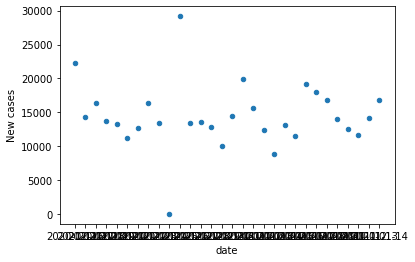

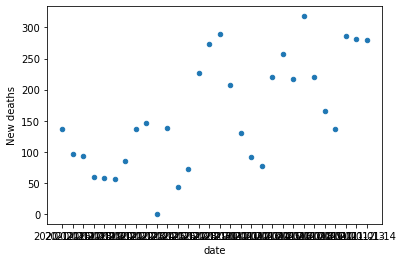

In [380]:
#Los Angeles plots:
all0.plot(kind='scatter', x='date', y='New cases') and all0.plot(kind='scatter', x='date', y='New deaths')

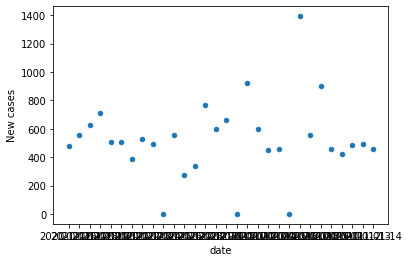

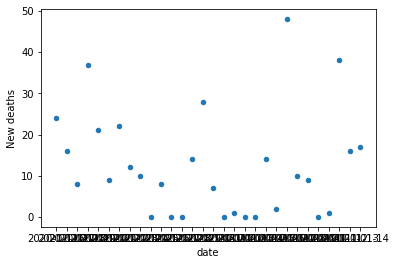

In [381]:
#St. Louis plots:
all1.plot(kind='scatter', x='date', y='New cases') and all1.plot(kind='scatter', x='date', y='New deaths')

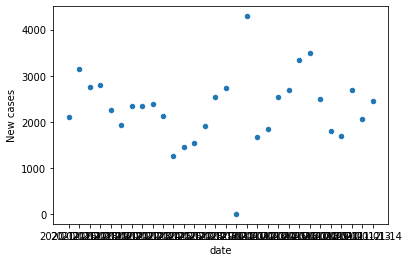

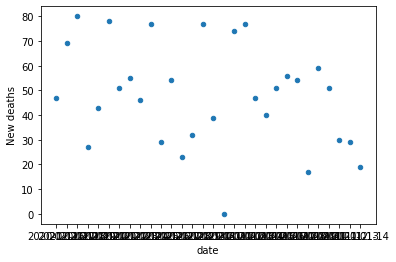

In [382]:
#Cook plots:
all2.plot(kind='scatter', x='date', y='New cases') and all2.plot(kind='scatter', x='date', y='New deaths')

In [ ]:
#Conclusion:

#New York city is the only county out of the four counties analyzed that demonstarted steady growth in both new cases and deaths over the last 30 days.
#The county with most new cases and deaths over the last 30 days is Los Angeles.
#Los Angeles, St. Louis, and Cook counties have all been fairly volatile over the last 30 days in terms of new cases and deaths. There is no identified strong pattern that demonstares a trend in any of the three counties.
#St. Louis is the county with least new cases and deaths, assumed to be as a result of county's population.